In [68]:
# ! pip install -U pip
# ! pip install -U matplotlib
# ! pip install -U numpy
# ! pip install -U scipy

In [69]:
import numpy as np
import math
import scipy
from matplotlib import pyplot as plt
from scipy.fft import fftfreq, fft, fftshift
from typing import Callable
from random import randint

### Дискретное преобразованеи Фурье (Реализация на numpy)


In [70]:
def plot(x, y):
    plt.plot(x, y)
    plt.grid(True)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.show()

In [71]:
def y_1(x):
    return math.sin(2*x*math.pi)

In [98]:
def discrete_count(
    func: Callable,
    discrete_range: np.ndarray,
) -> np.ndarray:
    result = np.zeros(discrete_range.shape)
    max_value = discrete_range.size
    for idx, value in enumerate(discrete_range):
        result[idx] = func((value - 1) / max_value)
    return result

In [99]:
def discrete_fourier_transform(
    array: np.ndarray,
    k: int
) -> np.imag:
    def count_values(item, n):
        return item * math.e ** (
            (-1) * ((2 * math.pi * k * n * 1j) /
                    len(array) - 1)
        )

    result = np.zeros(array.size, dtype=np.complex_)
    for idx, value in enumerate(array):
        result[idx] = count_values(value, idx)
    return np.sum(result)

In [100]:
def count_discrete_fourier_on(
    array: np.ndarray,
) -> np.ndarray:
    result = np.zeros(array.shape, dtype=np.complex_)
    for idx in range(array.size):
        result[idx] = discrete_fourier_transform(array, idx)
    return result

In [101]:
def reverse_fourier_transform(
    array: np.ndarray
) -> np.array:
    result = np.zeros(array.shape, dtype=np.complex_)
    for idx in range(array.size):
        result[idx] = (1 / len(array)) * \
            np.real(discrete_fourier_transform(array, (-1) * idx))
    return result

[ 0.00000000e+00  1.95090322e-01  3.82683432e-01  5.55570233e-01
  7.07106781e-01  8.31469612e-01  9.23879533e-01  9.80785280e-01
  1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  1.22464680e-16 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00 -9.80785280e-01 -9.23879533e-01 -8.31469612e-01
 -7.07106781e-01 -5.55570233e-01 -3.82683432e-01 -1.95090322e-01]


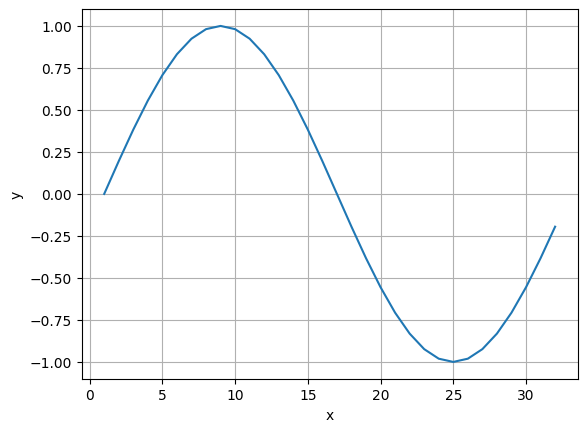

In [102]:
DISCRETE_COUNT_MAX = 32
discrete_range = np.arange(start=1, stop=DISCRETE_COUNT_MAX + 1)
discrete_values = discrete_count(y_1, discrete_range)
print(discrete_values)
plot(discrete_range, discrete_values)

c:\Users\playe\miniconda3\envs\ivc\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


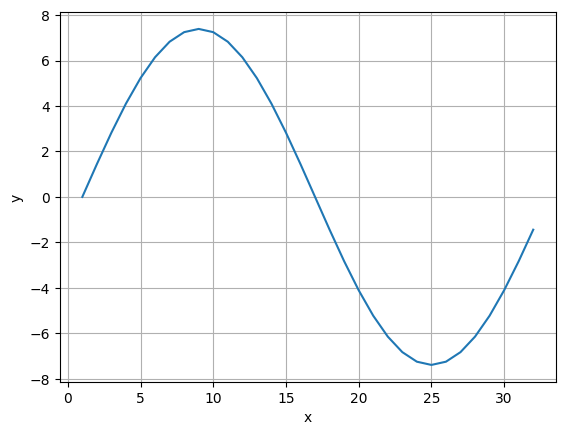

In [103]:
fourier_array = count_discrete_fourier_on(discrete_values)
reversed_fourier_array = reverse_fourier_transform(fourier_array)
plot(discrete_range, reversed_fourier_array)

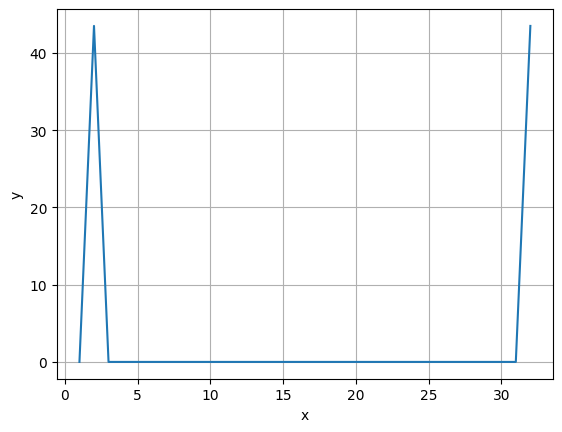

In [104]:
fourier_array = np.abs(fourier_array)
plot(discrete_range, fourier_array)

### Реализация Фурье на SciPy


In [112]:
def y_2(x):
    return math.sin(2 * math.pi * 50 * x) + math.sin(2 * math.pi * 120 * x) + (randint(0, 100) / 1000)

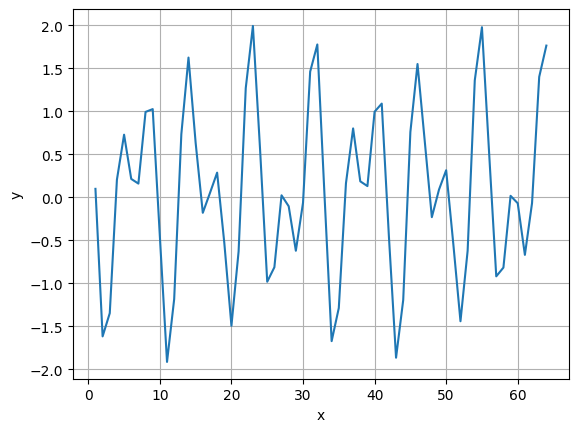

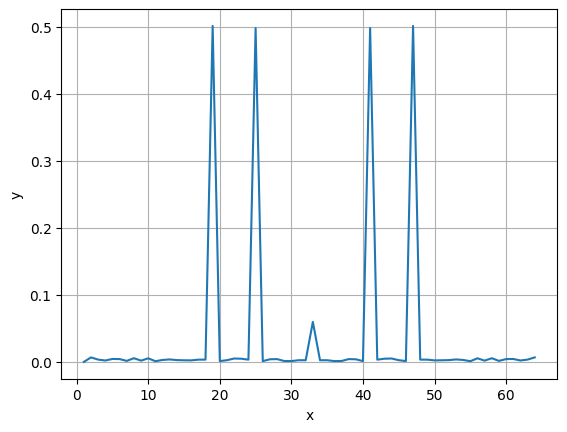

In [117]:
DISCRETE_COUNT_MAX = 6
SAMPLE_SPACING = 2 ** DISCRETE_COUNT_MAX


discrete_range = np.arange(start=1, stop=SAMPLE_SPACING + 1)


discrete_values = discrete_count(y_2, discrete_range)
plot(discrete_range, discrete_values)

fourier_array = fft(discrete_values)
yplot = fftshift(fourier_array)
yplot = 1.0/SAMPLE_SPACING * np.abs(yplot)
plot(discrete_range, yplot)